# Clase Nº 5

**Plan de la clase:**  
**(1)** Preguntas sobre la clase asincrónica. <br>
**(2)** Repaso de `pd.DataFrame.merge`. <br>
**(3)** Unir un dataframe con un geodataframe y visualizar atributos en un mapa <br>
**(4)** Unir dos geodataframes en base a atributos espaciales <br>

### Preguntas sobre la clase asincrónica

### Repaso de `pd.DataFrame.merge`

In [4]:
import pandas as pd

Creamos algunos DataFrame's de ejemplo

In [5]:
# 
df1 = [["a", "b", "c", "d"], [1, 2, 3, 4]]
df1 = pd.DataFrame(df1).transpose()
df1

df2 = [["a", "b", "d"], [5, 6, 7]]
df2 = pd.DataFrame(df2).transpose()

# Como df3 pero le cambiamos el nombre a las columnas
df3 = [["a", "b", "c"], [8, 9, 10]]
df3 = pd.DataFrame(df3).transpose()

# Como df3 pero le cambiamos el nombre a las columnas
df4 = [["a", "b", "c"], [8, 9, 10]]
df4 = pd.DataFrame(df4).transpose()
df4.columns = ["a", "b"]

display(df1)
display(df2)
display(df3)
display(df4)

,0,1
0,a,1
1,b,2
2,c,3
3,d,4


,0,1
0,a,5
1,b,6
2,d,7


,0,1
0,a,8
1,b,9
2,c,10


,a,b
0,a,8
1,b,9
2,c,10


Si no especificamos nada, el tipo de merge es `inner` y las columnas utilizadas son todas aquellas con el mismo nombre, para ambos DataFrames. En este caso, `df1` y `df2`, son ambas columnas: `0` y `1`. En este ejemplo no hay valores compartidos en la columna `1` para esos dos DataFrames, por lo tanto nos la operación nos devuelve un DataFrame vacío.

In [6]:
pd.merge(df1, df2)

,0,1


Si no especificamos nombres de columnas y no hay columnas con el mismo nombre, (ej. `df1` y `df4`), nos da un error de tipo `MergeError`:

In [7]:
try:
    pd.merge(df1, df4)
except pd.errors.MergeError:
    print("Estos DataFrame's no tiene columnas compartidas")

Estos DataFrame's no tiene columnas compartidas


Especificamos que la unión sea en base a la columna `0`:

In [8]:
pd.merge(df1, df2, on=0) # how="inner" por defecto

,0,1_x,1_y
0,a,1,5
1,b,2,6
2,d,4,7


Podemos examinar distintos tipos de unión:

In [9]:
display(pd.merge(df1, df2, on=0, how="inner"))
display(pd.merge(df1, df2, on=0, how="left"))
display(pd.merge(df2, df1, on=0, how="right"))
display(pd.merge(df2, df3, on=0, how="outer"))

,0,1_x,1_y
0,a,1,5
1,b,2,6
2,d,4,7


,0,1_x,1_y
0,a,1,5
1,b,2,6
2,c,3,NaN
3,d,4,7


,0,1_x,1_y
0,a,5,1
1,b,6,2
2,c,NaN,3
3,d,7,4


,0,1_x,1_y
0,a,5,8
1,b,6,9
2,c,NaN,10
3,d,7,NaN


Especificamos distintos sufijos para aquellas columnas que tienen el mismo nombre en los distintos DF's

In [10]:
pd.merge(df1, df2, on=0, suffixes=("_1", "_2"), how="outer")

,0,1_1,1_2
0,a,1,5
1,b,2,6
2,c,3,NaN
3,d,4,7


Usando los argumentos `left_on` y `right_on` para especificar distintas columnas de unión en cada DataFrame

In [11]:
pd.merge(df2, df4, left_on=0, right_on="a", how="right")

,0,1,a,b
0,a,5,a,8
1,b,6,b,9
2,c,NaN,c,10


#### `cross`
Este tipo de `merge` es diferente, lo podemos describir como "todos con todos". No se especifica en base a qué columnas unir, porque el DataFrame resultante es simplemente la combinación de todas las filas del primero con todas las filas del segundo.

In [12]:
pd.merge(df2, df4, how='cross')

,0,1,a,b
0,a,5,a,8
1,a,5,b,9
2,a,5,c,10
3,b,6,a,8
4,b,6,b,9
5,b,6,c,10
6,d,7,a,8
7,d,7,b,9
8,d,7,c,10


___

### Unir un geodataframe con un dataframe a través de un atributo no espacial

Vamos a ejemplificar cómo unir un `DataFrame` de Pandas con un `GeoDataFrame` de Geopandas.
Para eso vamos a utilizar una tabla que contiene la población de las distintas provincias argentinas, y el shapefile de las provincias que ya vimos en la clase asincrónica.

In [13]:
import numpy as np
import pandas as pd
import geopandas as gpd

Descarguemos la tabla de población por provincia de [esta página](https://www.ign.gob.ar/NuestrasActividades/Geografia/DatosArgentina/Poblacion2) del sitio del IGN.
Para eso utilizamos la función `read_html` de `Pandas` que es capaz de extraer tablas de un archivo `html`.
Pueden necesitar instalar el paquete `lxml`, con `pip install lxml` en la terminal/cmd.

In [14]:
url_pob = "https://www.ign.gob.ar/NuestrasActividades/Geografia/DatosArgentina/Poblacion2"
tablas = pd.read_html(url_pob)

In [15]:
type(tablas)

list

In [16]:
len(tablas)

3

In [17]:
poblacion_df = tablas[2]

In [18]:
poblacion_df

,Jurisdicción,Año 2010,Año 2015,Año 2020
0,República Argentina,40.117.096,43.131.966,45.376.763
1,Ciudad Autónoma de Buenos Aires,2.890.151,3.054.267,3.075.646
2,Buenos Aires,15.625.084,16.659.931,17.541.141
3,Catamarca,367.828,396.895,415.438
4,Chaco,1.055.259,1.143.201,1.204.541
5,Chubut,509.108,566.922,618.994
6,Córdoba,3.308.876,3.567.654,3.760.450
7,Corrientes,992.595,1.070.283,1.120.801
8,Entre Ríos,1.235.994,1.321.415,1.385.961
9,Formosa,530.162,579.250,605.193


In [19]:
poblacion_df.dtypes

Jurisdicción    object
Año 2010        object
Año 2015        object
Año 2020        object
dtype: object

Preprocesamos el dataframe de población:

In [20]:
def convertir_a_int(fila, cols=["Año 2010", "Año 2015", "Año 2020"]):    

    '''
    Convertir cols, que contienen strings de números con "." como separador de miles, a tipo entero.
    '''
    
    try:
        for col in cols:
            fila[col] = int(fila[col].replace(".",""))
    except:
        pass
        
    return fila

In [21]:
poblacion_df = poblacion_df.apply(convertir_a_int, axis=1)

In [22]:
poblacion_df.dtypes

Jurisdicción    object
Año 2010         int64
Año 2015         int64
Año 2020         int64
dtype: object

___

Ahora carguemos un GeoDataFrame con las provincias de Argentina:

In [23]:
provincias_gdf = gpd.read_file(filename="datos_asincronica/provincia/provincia.zip")
provincias_gdf.head()

,gid,entidad,objeto,fna,gna,nam,in1,fdc,sag,geometry
0,1,0.0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,02,Geografía,IGN,"MULTIPOLYGON (((-58.34189 -34.6311, -58.3424 -..."
1,2,0.0,Provincia,Provincia del Neuquén,Provincia,Neuquén,58,Geografía,IGN,"MULTIPOLYGON (((-68.25 -37.57478, -68.25 -37.5..."
2,3,0.0,Provincia,Provincia de San Luis,Provincia,San Luis,74,Geografía,IGN,"MULTIPOLYGON (((-66.66179 -31.92054, -66.60454..."
3,4,0.0,Provincia,Provincia de Santa Fe,Provincia,Santa Fe,82,Geografía,IGN,"MULTIPOLYGON (((-58.88082 -28.06682, -58.8836 ..."
4,5,0.0,Provincia,Provincia de La Rioja,Provincia,La Rioja,46,Geografía,IGN,"MULTIPOLYGON (((-65.42299 -30.1196, -65.49056 ..."


In [24]:
provincias_gdf = provincias_gdf[["nam", "geometry"]]
provincias_gdf

,nam,geometry
0,Ciudad Autónoma de Buenos Aires,"MULTIPOLYGON (((-58.34189 -34.6311, -58.3424 -..."
1,Neuquén,"MULTIPOLYGON (((-68.25 -37.57478, -68.25 -37.5..."
2,San Luis,"MULTIPOLYGON (((-66.66179 -31.92054, -66.60454..."
3,Santa Fe,"MULTIPOLYGON (((-58.88082 -28.06682, -58.8836 ..."
4,La Rioja,"MULTIPOLYGON (((-65.42299 -30.1196, -65.49056 ..."
5,Catamarca,"MULTIPOLYGON (((-66.09976 -26.22049, -66.10088..."
6,Tucumán,"MULTIPOLYGON (((-64.49532 -26.21937, -64.49723..."
7,Chaco,"MULTIPOLYGON (((-58.37735 -26.87223, -58.37764..."
8,Formosa,"MULTIPOLYGON (((-58.37735 -26.87223, -58.37935..."
9,Santa Cruz,"MULTIPOLYGON (((-71.54709 -45.99975, -71.54573..."


Examinemos el mapa generado al plotear la geometría asociada a este `GeoDataFrame`.

/home/rodrigo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


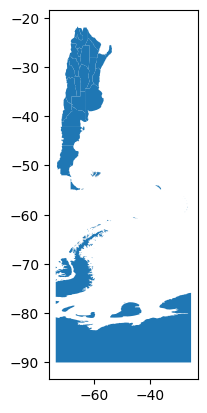

In [25]:
provincias_gdf.plot();

Bounding box para excluir a la Antártida:

In [26]:
TdF_bounding_box = (-75,-60,-40,-55)
xmin, ymin, xmax, ymax = TdF_bounding_box

Usemos indexado de `GeoDataFrame`s (`gpd.GeoDataFrame.cx`) para seleccionar la fila correspondiente a Tierra del Fuego.

In [27]:
TdF_Antartida_islas = provincias_gdf.cx[xmin:xmax, ymin:ymax]

¿Cómo luce el mapa para esta fila sola?

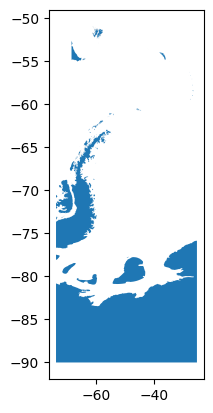

In [28]:
provincias_gdf.cx[xmin:xmax, ymin:ymax].plot();

Notar que pese a que utilizamos una bounding box que excluía a la Antártida, el indexado por coordenadas no funcionó para excluirla. La razón es que esta jurisdicción es un multipolígono (`MultiPolygon`) y el indexado por coordenadas nos trae el multipolígono completo, no los polígonos individuales que pertenecen a la bounding box.

Si queremos extraer los polígonos individuales que están incluidos en la bounding box, debemos hacer algo más sofisticado:

In [29]:
from shapely.geometry.multipolygon import MultiPolygon

In [30]:
TdF_Antartida_islas.geometry.explode(index_parts=True)

22  0       POLYGON ((-25 -75.87687, -25 -76.11135, -25 -7...
    1       POLYGON ((-57.28299 -63.21713, -57.28055 -63.2...
    2       POLYGON ((-46.99166 -77.77235, -46.96206 -77.7...
    3       POLYGON ((-70.35665 -68.81383, -70.34887 -68.8...
    4       POLYGON ((-59.80424 -80.34616, -59.8578 -80.52...
                                  ...                        
    1397    POLYGON ((-58.35027 -51.43731, -58.34965 -51.4...
    1398    POLYGON ((-64.34995 -54.84371, -64.34979 -54.8...
    1399    POLYGON ((-60.29898 -51.59865, -60.29957 -51.5...
    1400    POLYGON ((-60.09733 -51.68226, -60.09736 -51.6...
    1401    POLYGON ((-61.09057 -52.00288, -61.09058 -52.0...
Name: geometry, Length: 1402, dtype: geometry

In [31]:
TdF_bounding_box = (-75,-60,-40,-55)
xmin, ymin, xmax, ymax = TdF_bounding_box

TdF_muchos_poligonos = TdF_Antartida_islas.geometry.explode(index_parts=True)

In [32]:
TdF_muchos_poligonos = TdF_muchos_poligonos.cx[xmin:xmax, ymin:ymax]
TdF_muchos_poligonos = TdF_muchos_poligonos.to_list()

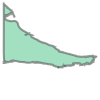

In [33]:
TdF_multipol = MultiPolygon(TdF_muchos_poligonos)
TdF_multipol

___

### Ejercicio 1 (entre todos)

Crear una _bounding box_ similar a la creada para Tierra del Fuego, pero ahora para las Islas Malvinas. Seguir un procedimiento similar al realizado para Tierra del Fuego, finalmente agregar la geometría de las Islas Malvinas al multipolígono de Tierra del Fuego creado anteriormente. 

Modificar el Geodataframe original reemplazando el original por este.

In [34]:
IM_bounding_box = (-62, -54, -55, -50)
xmin, ymin, xmax, ymax = IM_bounding_box

IM_muchos_poligonos = TdF_Antartida_islas.geometry.explode(index_parts=True)
IM_muchos_poligonos = IM_muchos_poligonos.cx[xmin:xmax, ymin:ymax]
IM_muchos_poligonos = IM_muchos_poligonos.to_list()

In [35]:
IM_muchos_poligonos

[<POLYGON ((-59.206 -52.048, -59.205 -52.048, -59.206 -52.048, -59.207 -52.04...>,
 <POLYGON ((-60.036 -51.406, -60.035 -51.405, -60.034 -51.405, -60.033 -51.40...>,
 <POLYGON ((-60.889 -51.765, -60.887 -51.765, -60.886 -51.765, -60.884 -51.76...>,
 <POLYGON ((-60.284 -51.264, -60.282 -51.265, -60.282 -51.265, -60.282 -51.26...>,
 <POLYGON ((-59.764 -51.248, -59.763 -51.248, -59.763 -51.248, -59.762 -51.24...>,
 <POLYGON ((-58.426 -51.988, -58.424 -51.988, -58.423 -51.988, -58.422 -51.98...>,
 <POLYGON ((-59.778 -52.149, -59.777 -52.151, -59.775 -52.152, -59.773 -52.15...>,
 <POLYGON ((-59.957 -51.284, -59.958 -51.286, -59.957 -51.287, -59.955 -51.28...>,
 <POLYGON ((-61.235 -51.795, -61.234 -51.795, -61.233 -51.795, -61.231 -51.79...>,
 <POLYGON ((-59.687 -52.307, -59.687 -52.307, -59.687 -52.308, -59.688 -52.30...>,
 <POLYGON ((-58.825 -52.156, -58.828 -52.159, -58.829 -52.161, -58.831 -52.16...>,
 <POLYGON ((-61.257 -51.678, -61.255 -51.679, -61.254 -51.681, -61.254 -51.68...>,
 <PO

In [36]:
IM_muchos_poligonos

[<POLYGON ((-59.206 -52.048, -59.205 -52.048, -59.206 -52.048, -59.207 -52.04...>,
 <POLYGON ((-60.036 -51.406, -60.035 -51.405, -60.034 -51.405, -60.033 -51.40...>,
 <POLYGON ((-60.889 -51.765, -60.887 -51.765, -60.886 -51.765, -60.884 -51.76...>,
 <POLYGON ((-60.284 -51.264, -60.282 -51.265, -60.282 -51.265, -60.282 -51.26...>,
 <POLYGON ((-59.764 -51.248, -59.763 -51.248, -59.763 -51.248, -59.762 -51.24...>,
 <POLYGON ((-58.426 -51.988, -58.424 -51.988, -58.423 -51.988, -58.422 -51.98...>,
 <POLYGON ((-59.778 -52.149, -59.777 -52.151, -59.775 -52.152, -59.773 -52.15...>,
 <POLYGON ((-59.957 -51.284, -59.958 -51.286, -59.957 -51.287, -59.955 -51.28...>,
 <POLYGON ((-61.235 -51.795, -61.234 -51.795, -61.233 -51.795, -61.231 -51.79...>,
 <POLYGON ((-59.687 -52.307, -59.687 -52.307, -59.687 -52.308, -59.688 -52.30...>,
 <POLYGON ((-58.825 -52.156, -58.828 -52.159, -58.829 -52.161, -58.831 -52.16...>,
 <POLYGON ((-61.257 -51.678, -61.255 -51.679, -61.254 -51.681, -61.254 -51.68...>,
 <PO

In [37]:
# Sumamos las dos listas de polígonos
TdF_IM_pols = TdF_muchos_poligonos + IM_muchos_poligonos
MultiPolygon(TdF_IM_pols)

In [38]:
TdF_IM_nombre = 'Tierra del Fuego, Antártida e Islas del Atlántico Sur'
TdF_IM_df = pd.DataFrame([TdF_IM_nombre], columns=["nam"])
TdF_IM_fila = gpd.GeoDataFrame(TdF_IM_df, geometry=[TdF_multipol], crs=4326)
provincias_gdf = provincias_gdf.drop(22).reset_index(drop=True)
provincias_gdf = pd.concat([provincias_gdf, TdF_IM_fila]).reset_index(drop=True)
provincias_gdf

,nam,geometry
0,Ciudad Autónoma de Buenos Aires,"MULTIPOLYGON (((-58.34189 -34.6311, -58.3424 -..."
1,Neuquén,"MULTIPOLYGON (((-68.25 -37.57478, -68.25 -37.5..."
2,San Luis,"MULTIPOLYGON (((-66.66179 -31.92054, -66.60454..."
3,Santa Fe,"MULTIPOLYGON (((-58.88082 -28.06682, -58.8836 ..."
4,La Rioja,"MULTIPOLYGON (((-65.42299 -30.1196, -65.49056 ..."
5,Catamarca,"MULTIPOLYGON (((-66.09976 -26.22049, -66.10088..."
6,Tucumán,"MULTIPOLYGON (((-64.49532 -26.21937, -64.49723..."
7,Chaco,"MULTIPOLYGON (((-58.37735 -26.87223, -58.37764..."
8,Formosa,"MULTIPOLYGON (((-58.37735 -26.87223, -58.37935..."
9,Santa Cruz,"MULTIPOLYGON (((-71.54709 -45.99975, -71.54573..."


### Sistemas de coordenadas de referencia

In [39]:
provincias_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Los CRS **geográficos** no permiten calcular el área en kilómetros cuadrados. Necesitamos pasar a un CRS **proyectado**.

In [40]:
provincias_gdf.area

/tmp/ipykernel_498091/1545487346.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  provincias_gdf.area


0      0.020242
1      9.771811
2      7.333771
3     12.552838
4      8.529216
5      9.256945
6      2.053388
7      9.024889
8      6.745721
9     29.943876
10    25.085834
11    14.658388
12    15.748328
13     7.486742
14     8.328441
15     4.700836
16    12.540224
17    21.451217
18     8.235679
19     2.717002
20    13.817806
21    14.552939
22    30.864529
23     2.784796
dtype: float64

In [41]:
def auto_utm_zone(gdf):
    """Determinar la zona UTM y el hemisferio a partir de los valores de la bounding box."""
    
    # Calcular el centro de la bounding box
    centroid_lon = gdf.geometry.total_bounds[[0, 2]].mean()
    centroid_lat = gdf.geometry.total_bounds[[1, 3]].mean()
    
    # Determinar la zona UTM a partir de la longitud
    zone = int((centroid_lon + 180) // 6) + 1
    
    # Determinar el hemisferio (norte o sur) a partir del signo de la latitud
    hemisphere = 'north' if centroid_lat >= 0 else 'south'
    
    # El código EPSG para UTM depende de la zona, de la siguiente manera:
    epsg_code = f"EPSG:{32600 + zone if hemisphere == 'north' else 32700 + zone}"
    return epsg_code


In [42]:
utm_crs = auto_utm_zone(provincias_gdf)

In [43]:
utm_crs

'EPSG:32720'

In [44]:
# Ahora sí podemos calcular el área
provincias_gdf.to_crs(utm_crs).area / 1e6

0        206.665629
1      95253.287119
2      75442.156406
3     133288.029050
4      91815.107341
5     101817.591952
6      22605.603124
7      99833.101232
8      75636.102476
9     245904.290554
10    225321.436047
11    149950.048162
12    164631.509727
13     78581.302830
14     88935.171306
15     53314.999048
16    136852.422428
17    202823.335058
18     89640.711612
19     30403.766104
20    155442.075320
21    143583.653653
22    306348.144625
23     20192.962378
dtype: float64

### Ejercicio 2

Unir las bases `provincias_gdf` y `poblacion_df` por el nombre de la provincia. Notar que necesitamos especificar `left_on` y `right_on` porque los nombres de las columnas correspondientes son diferentes (o bien cambiar el nombre de una de las columnas).

- Examinar el tipo de objeto que resulta del `merge` usando `provincias_gdf` a la izquierda y `poblacion_df` a la derecha.
- Ídem anterior, con `poblacion_df` a la izquierda y `provincias_gdf` a la derecha.

A continuación, representar un mapa del país coloreando cada provincia en base a la variación relativa en su población en el período 2015-2020. Para el merge, usar el orden de (Geo)DataFrame's que corresponda.

In [45]:
merge = poblacion_df.merge(provincias_gdf, right_on="nam", left_on="Jurisdicción", how="outer")

In [46]:
type(merge)

pandas.core.frame.DataFrame

In [47]:
merge = pd.merge(provincias_gdf, poblacion_df, left_on="nam", right_on="Jurisdicción", how="outer")

In [48]:
type(merge)

geopandas.geodataframe.GeoDataFrame

In [49]:
merge = merge.apply(convertir_a_int, axis=1)

In [50]:
merge.dtypes

nam               object
geometry        geometry
Jurisdicción      object
Año 2010           int64
Año 2015           int64
Año 2020           int64
dtype: object

In [51]:
merge["var_pob"] = (merge["Año 2020"] - merge["Año 2015"]) / merge["Año 2015"]

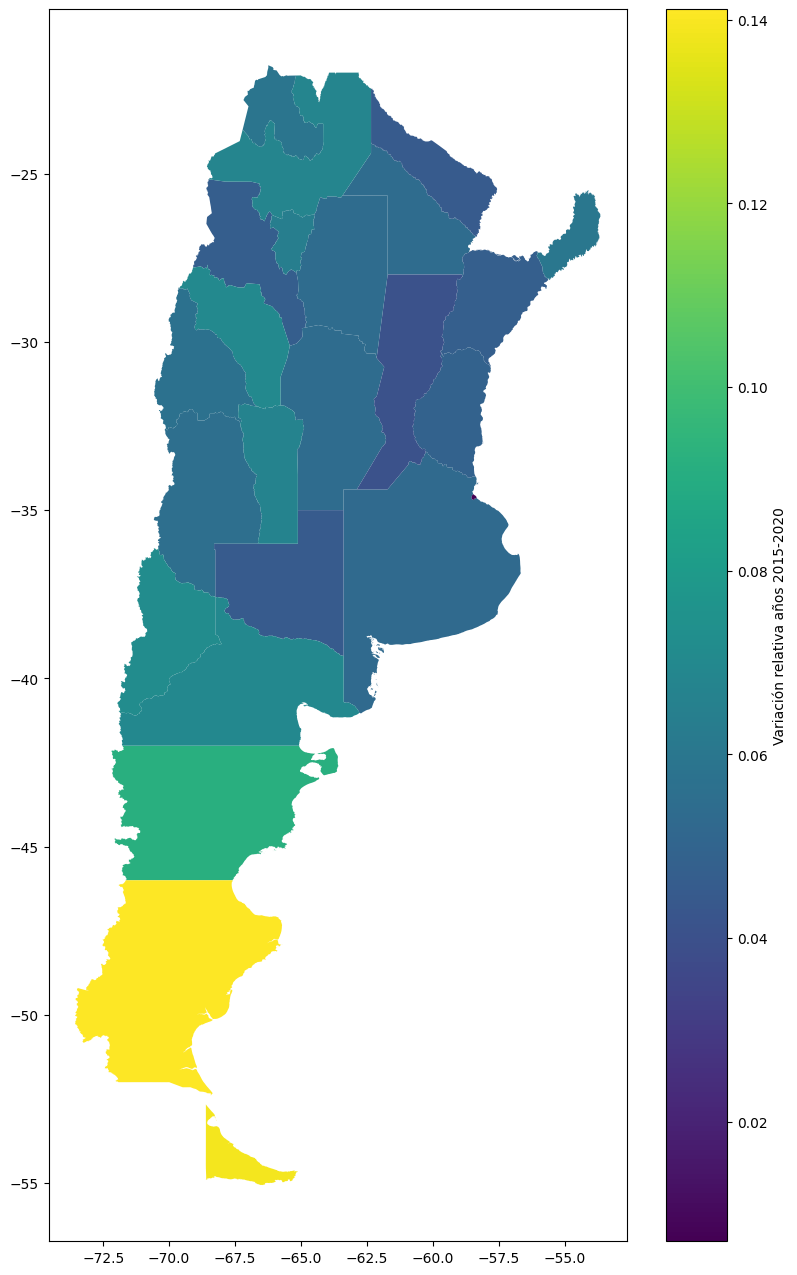

In [56]:
merge.plot(
    figsize=(10, 16),
    column="var_pob",
    legend=True,
    legend_kwds={'label': "Variación relativa años 2015-2020", 'orientation': "vertical"} 
);

### Ejercicio 3

Repetir el mapa anterior pero ahora colorear por densidad de población. Para eso, calcular previamente el área de cada provincia usando Geopandas. Recordar que necesitamos pasar a un CRS "proyectado" como hicimos arriba. Quitar a Capital Federal para que no desplace la escala demasiado. 

(_Ayuda_: cuando pasamos al CRS UTM, las coordenadas nos quedan en metros. Por lo tanto, como hicimos arriba, al calcular el área hay que dividir por 1.000.000)

In [57]:
poblacion_df = poblacion_df.apply(convertir_a_int, axis=1)

In [60]:
provincias_gdf_proj = provincias_gdf.to_crs(utm_crs) 
provincias_gdf_proj['area_km2'] = provincias_gdf_proj.area / 1e6

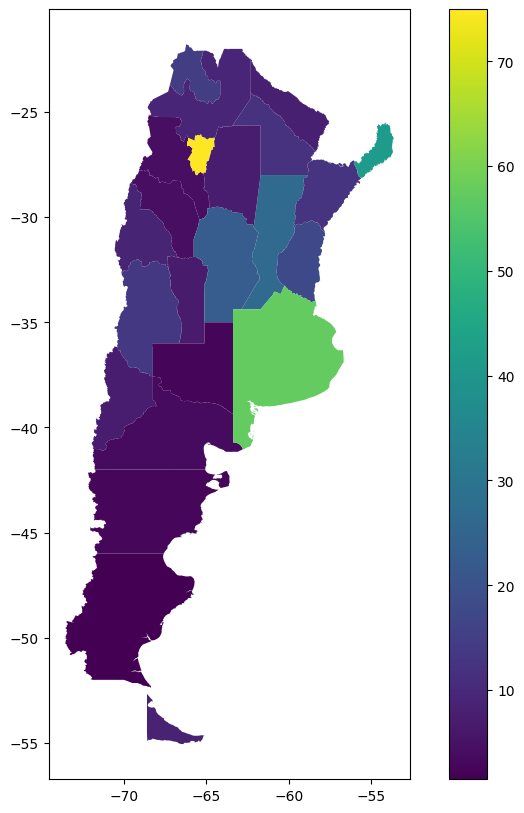

In [63]:
provincias_poblacion_gdf = pd.merge(provincias_gdf_proj, poblacion_df, left_on='nam', right_on='Jurisdicción', how='left')

provincias_poblacion_gdf['densidad_pob'] = provincias_poblacion_gdf['Año 2020'] / provincias_poblacion_gdf['area_km2']

provincias_poblacion_gdf = provincias_poblacion_gdf[provincias_poblacion_gdf['nam'] != 'Ciudad Autónoma de Buenos Aires']

provincias_poblacion_gdf.to_crs(4326).plot(column='densidad_pob', cmap='viridis', legend=True, figsize=(10, 10));

___

### Unir geodatraframes por un atributo espacial: `sjoin`

**Ejercicio:** Leer el shapefile de departamentos como GeoDataFrame. Crear un widget reactivo que permita elegir una provincia y muestre un mapa con la división departamental de la misma.

Geopandas permite unir dos GeoDataFrames en base a relaciones espaciales entre las observaciones (filas) de cada uno.

Vamos a usar estas relaciones espaciales para poder vincular departamentos con provincias.

In [64]:
departamentos_gdf = gpd.read_file("datos/departamento.zip")

# Extraemos las columnas de interés
# objectid es un identificador único para cada departamento a nivel país 
# Lo necesitamos porque hay departamentos cuyos nombres se repiten en distintas provincias.
departamentos_gdf = departamentos_gdf[["objectid", "nam", "geometry"]]

# Renombramos la columna que da el nombre del departamento
departamentos_gdf = departamentos_gdf.rename({"nam": "departamento"}, axis=1)

Examinemos este GeoDataFrame. ¿Qué problema nos encontramos?

In [65]:
departamentos_gdf

,objectid,departamento,geometry
0,8076.0,Federal,"POLYGON ((-58.57731 -30.69016, -58.57512 -30.6..."
1,8077.0,Gualeguaychú,"POLYGON ((-58.13011 -33.02912, -58.13087 -33.0..."
2,8078.0,Islas del Ibicuy,"POLYGON ((-58.57589 -34.02675, -58.57593 -34.0..."
3,8268.0,Cushamen,"POLYGON ((-71.1749 -41.99995, -71.05132 -41.99..."
4,8079.0,Victoria,"POLYGON ((-59.77158 -32.58791, -59.77198 -32.5..."
...,...,...,...
524,8576.0,Iglesia,"POLYGON ((-69.62981 -28.39369, -69.62956 -28.3..."
525,8577.0,Jáchal,"POLYGON ((-68.25879 -29.74673, -68.26262 -29.7..."
526,8578.0,Valle Fértil,"POLYGON ((-67.99199 -29.97924, -67.99151 -29.9..."
527,8579.0,La Plata,"MULTIPOLYGON (((-57.99666 -34.87535, -57.99087..."


El problema es que **no tenemos la provincia** asociada a cada departamento. 

Claro que podríamos conseguir esta relación de alguna forma pero, en lugar de eso, vamos a inferirla mediante **relaciones espaciales**.

Vamos a hacer lo siguiente: dado que conocemos los polígonos correspondientes a las provincias y a los departamentos, podemos preguntarnos _cuáles departamentos están dentro de qué provincias_.

El plan, entonces, será:
- obtener un punto que esté **dentro** de cada departamento del país, guardando el ID del departamento correspondiente. El nombre del departamento no sirve a este fin pues los nombres de departamento se repiten en distintas provincias.
    - Una opción sería usar el centroide (promedio de las coordenadas de los puntos), sin embargo esto puede fallar (¿en qué casos?).
    - En lugar de eso vamos a usar un método llamado `.representative_point()`.
- determinar qué puntos están ubicados dentro de qué (multi)polígonos de provincias. Esto nos daría la relación departamento -> provincia.

___

Primero, obtenemos los centroides de cada departamento.
Esto nos va a dar un `UserWarning`. ¿Por qué? Porque queremos calcular el centroide en un CRS geográfico: vamos a estar promediando latitudes y longitudes en lugar de distancias. Esto no nos preocupa, pues no estamos interesados en el valor exacto del centroide y, por otro lado, los departamentos son lo suficientemente chicos como para que esta diferencia no importe.

In [66]:
departamentos_punto_adentro_gdf = departamentos_gdf.copy()
departamentos_punto_adentro_gdf["geometry"] = departamentos_gdf.geometry.representative_point();

Ahora realizamos el **join espacial** con `sjoin`. Para hacer un sjoin necesitamos un **predicado**, la relación espacial según la cual queremos unir.

Utilizamos el predicado `within`. Este es el tipo de relación que deseamos: queremos que el centroide de cada departamento esté adentro de (_within_) la geometría de la provincia.
Para ver una lista extensiva de predicados posibles se puede consultar [esta página de documentación de Shapely](https://shapely.readthedocs.io/en/stable/manual.html) (sección **Relationships**) o [este PDF](https://giswiki.hsr.ch/images/3/3d/9dem_springer.pdf). Otros valores posibles son `intersects`, `contains`, `overlaps` y `touches`.

In [67]:
prov_dep_gdf = departamentos_punto_adentro_gdf.sjoin(provincias_gdf, predicate="within")

In [68]:
prov_dep_gdf

,objectid,departamento,geometry,index_right,nam
0,8076.0,Federal,POINT (-58.91187 -31.02845),13,Entre Ríos
1,8077.0,Gualeguaychú,POINT (-58.7437 -32.99769),13,Entre Ríos
2,8078.0,Islas del Ibicuy,POINT (-58.89465 -33.59711),13,Entre Ríos
3,8268.0,Cushamen,POINT (-70.75026 -42.47312),10,Chubut
4,8079.0,Victoria,POINT (-60.25788 -32.75127),13,Entre Ríos
...,...,...,...,...,...
524,8576.0,Iglesia,POINT (-69.47882 -29.59285),14,San Juan
525,8577.0,Jáchal,POINT (-68.45414 -30.29809),14,San Juan
526,8578.0,Valle Fértil,POINT (-67.59727 -30.59801),14,San Juan
527,8579.0,La Plata,POINT (-57.99022 -35.03683),22,Buenos Aires


In [69]:
prov_dep_df = prov_dep_gdf[["objectid", "nam"]]

In [70]:
prov_dep_df

,objectid,nam
0,8076.0,Entre Ríos
1,8077.0,Entre Ríos
2,8078.0,Entre Ríos
3,8268.0,Chubut
4,8079.0,Entre Ríos
...,...,...
524,8576.0,San Juan
525,8577.0,San Juan
526,8578.0,San Juan
527,8579.0,Buenos Aires


In [71]:
departamentos_gdf = departamentos_gdf.merge(prov_dep_df, how="inner", on="objectid")

In [72]:
departamentos_gdf = departamentos_gdf.rename({"nam_x": "nam"}, axis=1)

In [73]:
provincias = set(departamentos_gdf.nam.to_list())

In [74]:
departamentos_gdf

,objectid,departamento,geometry,nam
0,8076.0,Federal,"POLYGON ((-58.57731 -30.69016, -58.57512 -30.6...",Entre Ríos
1,8077.0,Gualeguaychú,"POLYGON ((-58.13011 -33.02912, -58.13087 -33.0...",Entre Ríos
2,8078.0,Islas del Ibicuy,"POLYGON ((-58.57589 -34.02675, -58.57593 -34.0...",Entre Ríos
3,8268.0,Cushamen,"POLYGON ((-71.1749 -41.99995, -71.05132 -41.99...",Chubut
4,8079.0,Victoria,"POLYGON ((-59.77158 -32.58791, -59.77198 -32.5...",Entre Ríos
...,...,...,...,...
522,8576.0,Iglesia,"POLYGON ((-69.62981 -28.39369, -69.62956 -28.3...",San Juan
523,8577.0,Jáchal,"POLYGON ((-68.25879 -29.74673, -68.26262 -29.7...",San Juan
524,8578.0,Valle Fértil,"POLYGON ((-67.99199 -29.97924, -67.99151 -29.9...",San Juan
525,8579.0,La Plata,"MULTIPOLYGON (((-57.99666 -34.87535, -57.99087...",Buenos Aires


Ahora representamos la división departamental de cada provincia en un mapa.

In [75]:
import ipywidgets as widgets 
from ipywidgets import interact
from matplotlib import pyplot as plt

provincias_w = widgets.Dropdown(options=sorted(list(provincias)))  # ordenamos alfabéticamente

@interact
def mostrar_deptos_por_provincia(provincia=provincias_w):

    provincia_gdf = departamentos_gdf.query("nam == @provincia")
    
    provincia_gdf.plot(cmap="tab10", figsize=(10,10), edgecolor='black')
    
    # Añadir etiquetas
    for idx, row in provincia_gdf.iterrows():        

        # Si el nombre tiene varios espacios, lo dividimos en dos líneas
        depto = "\n".join(row['departamento'].split(maxsplit=1))
        
        plt.annotate(
            text=depto, 
            xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
            horizontalalignment='center', size=7
        )

interactive(children=(Dropdown(description='provincia', options=('Buenos Aires', 'Catamarca', 'Chaco', 'Chubut…

Podríamos hacer una lógica más sofisticada para que los nombres de los departamentos/partidos se vean mejor, por ejemplo que el tamaño de la fuente dependa del tamaño de la jurisdicción.